## Imports

In [2]:
%load_ext autoreload
%autoreload 2
# add source folders to path
import sys,os
SRC = '..\\src'
src_folders = list(filter(lambda x: os.path.isdir(os.path.join(SRC,x)),os.listdir(SRC)))
[sys.path.append(os.path.join(SRC,folder)) for folder in src_folders]

# import custom libraries
from preamble import *
from helpers import save_joblib

# notebook imports
from coal_combustion_class import CoalCombustionModel
# custom file paths

# get data files
files_dict = walk_directory(raw_data)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model outline
- Fuel Flows
    -   Quality, Fuel Analysis
- Air Flows
    - Air Splits
    - CO, NOx
    - Ambient Temp and Humidity
- Soot
    - Rate of development
    - Accumulation
    - Heat Transfer Effects
- Soot Blowers
    - Blowing Duration
    - Frequency?
    - Media
    - Effect on soot (should there be some long-term perminent degradation?)
    


=== COAL COMBUSTION MODEL - CLASS IMPLEMENTATION ===


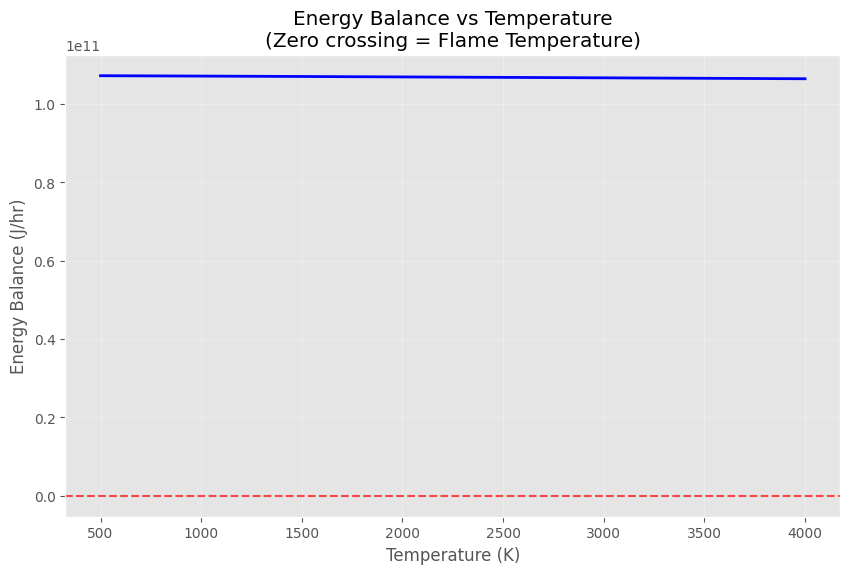

Using simplified estimate based on fuel heating value

=== Inputs ===

Air (scfh): 2,000,000.00
Coal (pph) As-received: 10,000.00
NOx Conversion Efficiency: 0.35
Air temperature (F): 75.00
Relative Humidity (%): 55.00
Atmospheric Pressure (inHg): 30.25

=== Interim Calculations ===

Coal HHV (Btu/lb): 11,480.9056
Coal Dry Ash-Free (pph): 8,950.0000
Humidity Ratio (h2o/dry air by mass): 0.0101
CO2 Fraction (CO2 formation vs CO2 + CO): 0.9858
Combustion Efficiency: 0.9898
Actual Heat Release (BTU/hr): 101,705,846.9527

=== Combustion Results (per hour) ===

Total Flue Gas (lb/hr): 354.96
CO2 (lb/hr): 58.94
CO (lb/hr): 0.54
H2O (lb/hr): 12.79
SO2 (lb/hr): 0.45
NO (lb/hr from fuel-N): 0.25
NO (lb/hr thermal): 0.00
NO (lb/hr total): 0.25
N2 (lb/hr): 254.91
O2 (lb/hr): 27.06
Dry O2 (% by vol): 7.91
Heat Released (BTU/hr): 101,705,846.95
Estimated Flame Temp (F): 2,608.55

=== ACCESSING INDIVIDUAL PROPERTIES ===
Coal HHV: 11,481 BTU/lb
Flame Temperature: 2,609 °F
Dry O2: 7.91 %
CO2 Emissions:

In [5]:
# Sample ultimate analysis (mass percent)
ultimate = {
    'C': 72.0,
    'H': 5.0,
    'O': 10.0,
    'N': 1.5,
    'S': 1.0,
    'Ash': 8.0,
    'Moisture': 2.5
}

# Create model instance
model = CoalCombustionModel(
    ultimate_analysis=ultimate,
    coal_lb_per_hr=10000,     # lb/hr of coal
    air_scfh=2000000,         # SCFH of air
    NOx_eff=0.35              # NOx efficiency
)

# Perform calculations
print("=== COAL COMBUSTION MODEL - CLASS IMPLEMENTATION ===")
model.calculate(debug=True)

# Access individual properties
print(f"\n=== ACCESSING INDIVIDUAL PROPERTIES ===")
print(f"Coal HHV: {model.coal_HHV_btu_per_lb:,.0f} BTU/lb")
print(f"Flame Temperature: {model.flame_temp_F:,.0f} °F")
print(f"Dry O2: {model.dry_O2_pct:,.2f} %")
print(f"CO2 Emissions: {model.CO2_lb_per_hr:,.0f} lb/hr")
print(f"NOx Emissions: {model.NO_total_lb_per_hr:,.2f} lb/hr")
print(f"Combustion Efficiency: {model.combustion_efficiency:.3f}")

# Demonstrate property changes trigger recalculation
print(f"\n=== TESTING PROPERTY CHANGES ===")
print(f"Original NOx efficiency: {model.NOx_eff}")
print(f"Original NOx emissions: {model.NO_total_lb_per_hr:.2f} lb/hr")

# Change NOx efficiency
model.NOx_eff = 0.50
print(f"New NOx efficiency: {model.NOx_eff}")
print(f"New NOx emissions: {model.NO_total_lb_per_hr:.2f} lb/hr")

# Change coal flow rate
original_coal_rate = model.coal_lb_per_hr
model.coal_lb_per_hr = 15000
print(f"\nCoal rate changed from {original_coal_rate:,.0f} to {model.coal_lb_per_hr:,.0f} lb/hr")
print(f"New CO2 emissions: {model.CO2_lb_per_hr:,.0f} lb/hr")
print(f"New Dry O2: {model.dry_O2_pct:,.2f} %")
print(f"New heat release: {model.heat_released_btu_per_hr:,.0f} BTU/hr")